# Данные

In [150]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

X, y = make_regression(n_features=20, n_samples=1000, n_informative=10)
model_sk =  LinearRegression( )
model_sk.fit(X, y)
w = model_sk.coef_

X.shape, y.shape, w.shape

((1000, 20), (1000,), (20,))

In [468]:
np.max(y), np.min(y)

(475.8709324962939, -466.4493843569292)

In [470]:
(475 - 4)**2

221841

In [469]:
np.mean((y - np.mean(y))**2)

24401.227687894214

# Собираем корпус под модель


In [151]:
X.shape

(1000, 20)

In [553]:
from sklearn.base import RegressorMixin, BaseEstimator
import numpy as np

class MetricError(Exception):
    print("")
    pass

class AwesomeRegression(RegressorMixin, BaseEstimator):
    
    def __init__(self, 
                 tol=1e-10, 
                 l2=0, 
                 l1=0,
                 lr=0.001,
                 num_iter=10000,
                 metric = "mse",
                 batch_size=100):
        
        # self.w = np.random.normal(size=(100))
        self.tol = tol
        self.l1 = l1
        self.l2 = l2
        self.num_iter = num_iter
        self.lr = lr
        self.iter = 0
        self.batch_size = batch_size
        self.metric = metric 
        self.history = [ ]
        
    def loss(self, X, y):
        if self.metric == "mse":
            mse = ((y - X @ self.w).T) @ (y - X @ self.w) / y.size    # RSS
            return mse
        elif self.metric == "mae":
            mae = np.mean(np.abs(y - X @ self.w))
            return mae
        else:
            raise MetricError("Пользуйтесь нормальными метриками!")

    def grad_loss(self, X, y):
        if self.metric == "mse":
            g = -2 * X.T@(y - X@self.w)
        elif self.metric == "mae":
            # (|y - Xw|)' = -X sign(y - Xw)
            g = -1*X.T@np.sign(y - X@self.w)
        else:
            raise MetricError("Пользуйтесь нормальными метриками!")
            
        # |w|' = 1, -1, 0 - не существует 
        # в 0 доопределяем производную, subgradient спуск 
        g_l1 = self.l1 * np.sign(self.w.T)
        g_l2 = 2 * self.l2*(self.w.T)
        return (g + g_l1 + g_l2)/y.size  
    
    
    def fit(self, X, y):  
        self.w = np.random.normal(size=(X.shape[1]))
        new_w = self.w - self.lr*self.grad_loss(X, y)

        while self.iter < self.num_iter and np.any(abs(new_w - self.w) > self.tol):
            
            self.history.append(self.loss(X,y))
            
            # одно рандомное наблюдение 
            ind_rand = np.random.choice(range(X.shape[0]), size=self.batch_size, replace=False)
            
            self.iter += 1
            self.w = new_w
            new_w = self.w - self.lr*self.grad_loss(X[ind_rand], y[ind_rand])
            

    def fit_formula(self, X, y):
        self.w = np.linalg.inv(X.T@X + self.l2*np.eye(X.shape[1]))@(X.T@y)
     
    def predict(self, X):
        return X@self.w

In [554]:
model = AwesomeRegression(l2=100, metric='mae')
model.fit_formula(X, y)

w_matrix = model.w
w_matrix[w_matrix < 1e-2] = 0
w_matrix

array([0.00000000e+00, 0.00000000e+00, 9.95185515e+00, 2.91731791e+01,
       0.00000000e+00, 6.56973364e+01, 0.00000000e+00, 7.87804137e+01,
       1.10559423e+01, 7.00118480e+01, 5.59280237e+00, 5.46292144e-02,
       4.10220230e+01, 3.73709106e+01, 3.37047650e+01, 4.49052690e-02,
       0.00000000e+00, 5.06899881e-01, 0.00000000e+00, 4.88234808e-01])

In [555]:
model.fit(X, y)
print(np.sum(np.abs(w_matrix - model.w)))
print(model.iter)
w_model = model.w
w_model[w_model < 1e-2] = 0
w_model

382.4772589451003
10000


array([0.        , 0.        , 0.01168242, 0.07101479, 0.        ,
       0.18798544, 0.        , 0.21142705, 0.02641423, 0.20674963,
       0.        , 0.0128893 , 0.08281834, 0.12513825, 0.07873689,
       0.        , 0.        , 0.        , 0.        , 0.02160991])

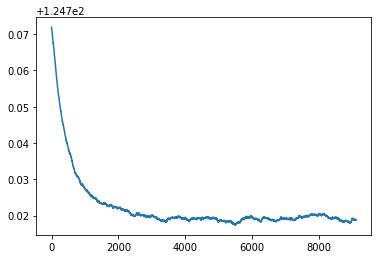

In [556]:
import matplotlib.pyplot as plt
plt.plot(model.history[900:]);

In [447]:
from sklearn.linear_model import Ridge, Lasso, SGDRegressor

model_r = Ridge(alpha=100, solver="sag", tol=1e-10, max_iter=1000)
#model_r = Lasso(alpha=50)
#model_r = SGDRegressor(alpha=1, l1_ratio=0.5)
model_r.fit(X, y)

print(np.sum(np.abs(w_matrix - model_r.coef_)))
print(model_r.n_iter_)

w_sklearn = model_r.coef_
w_sklearn[w_sklearn < 1e-2] = 0
w_sklearn

2.1469592308122962
[44]


array([0.00000000e+00, 0.00000000e+00, 9.95501396e+00, 2.91425167e+01,
       1.49462325e-02, 6.57001745e+01, 0.00000000e+00, 7.87647584e+01,
       1.10397492e+01, 7.00150369e+01, 5.60393355e+00, 5.25772954e-02,
       4.10165023e+01, 3.73659635e+01, 3.36980408e+01, 7.15691395e-02,
       0.00000000e+00, 5.03012242e-01, 0.00000000e+00, 5.26599338e-01])

## Задание 1 (добить линейную регрессию): 

__а)__ Добавить в обучение параметр `num_iter`, чтобы не возникало такого, что из-за неадекватно подобранного параметра `tol` цикл работает вечно. Установить параметр по дефолту в `1000` шагов.

__б)__ Добавить в модель возможность вводить l1 и l2 регуляризаторы (elstic_net), для этого придется выписать на бумажке фукнцию потерь и найти её дифференциал. Для l2 проблем быть не должно, для l1 придется быть поосторожнее с нулём. 

__в)__ Реализовать вместо текущего обычного градиентного спуска стохастический градиентный спуск по мини-батчам. Надо на каждой итерации отбирать $m$ случайных наблюдений и делать шаг градиентного спуска по ним. Параметр $m$ задаётся при объявлении модели.

__г)__ Сейчас обучение идёт с помощью функции потерь MSE. Хочется, чтобы была возможность выбора. 

- Добавьте такую возможность в виде функций потерь MAE
- Добавьте MAPE

__HINT:__ подсказка как добавить MAPE прямо через MAE: https://yadi.sk/i/WpIWG_PYeQkLVQ

- Добавьте функцию потерь Хубера

__HINT:__ про неё можно почитать либо в [главе про функции потерь Дьяконова](https://alexanderdyakonov.files.wordpress.com/2018/10/book_08_metrics_12_blog1.pdf) либо в [первой главе Магнуса Катышева Персецкого.](https://yadi.sk/i/K8P9rL1eDK0Dqg)

Склёрновская реализация такой модели [тут.](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.HuberRegressor.html)

- Придумайте свою функцию потерь с логарифмами такую, чтобы она была робастной к выбросам. 


__д)__ Протестировать модель на сгенерированном датасете. Сравнить результаты с пакетной реализацией. Подумать каких ещё приблуд можно засунуть внутрь модели. 

## Задание 2 (логистическая регрессия): 

Нужно реализовать аналогичный класс для обучения логистической регрессии. Должен быть точно такой же интерфейс, но другая модель. 

- В качестве функции потерь возьмите `logloss`. Добавьте опциональные ругуляризаторы, модель учите стохастическим градиентным спуском. Все производные найдите руками с помощью матричного диффериенцирования. Сравните работу модели с пакетной реализацией и возрадуйтесь.